In [250]:
from datetime import datetime 
from concurrent import futures 
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline    

In [8]:
tickers = pd.read_csv('spy/tickers.csv', header=None)[1].tolist()
start = datetime(2014,4,28)
end = datetime(2019,4,25)



In [9]:
import backtrader as bt
import numpy as np

determine the long or short capitol $w_i$ allocated to the $i^{th}$ stock

$w_i = -$

In [252]:
num_posititons = 100

def min_n(array, n):
    return np.argpartition(array, n)[:n]

def max_n(array, n):
    return np.argpartition(array, -n)[-n:]

class CrossSectionalMR(bt.Strategy):
    def __init__(self):
        self.inds = {}
        for d in self.datas:
            self.inds[d] = {}
            self.inds[d]["pct"] = bt.indicators.PercentChange(d.close, period=5)
            self.inds[d]["std"] = bt.indicators.StandardDeviation(d.close, period=5)

    def prenext(self):
        self.next()
    
    def next(self):
        available = list(filter(lambda d: len(d) > 5, self.datas)) # only look at data that existed last week
        rets = np.zeros(len(available))
        stds = np.zeros(len(available))
            
        for i, d in enumerate(available):
            rets[i] = self.inds[d]['pct'][0]
            stds[i] = self.inds[d]['std'][0]

        market_ret = np.mean(rets)
        weights = -(rets - market_ret)
        
        max_weights_index = max_n(np.abs(weights), num_posititons)
        low_volality_index = min_n(stds, num_posititons)
        
        selected_weights_index = np.intersect1d(max_weights_index,
                                                low_volality_index)
        
        if not len(selected_weights_index):
            # no good trades today
            return
            
        selected_weights = weights[selected_weights_index]
        
        
        weights = weights / np.sum(np.abs(selected_weights))
                
        for i, d in enumerate(available):
            if i in selected_weights_index:
                self.order_target_percent(d, target=weights[i])
            else:
                self.order_target_percent(d, 0)

In [253]:
cerebro = bt.Cerebro(stdstats=False)
cerebro.broker.set_coc(True)

for ticker in tickers:
    data = bt.feeds.GenericCSVData(
        fromdate=start,
        todate=end,
        dataname=f"spy/{ticker}.csv",
        dtformat=('%Y-%m-%d'),
        openinterest=-1,
        nullvalue=0.0,
        plot=False
    )
    cerebro.adddata(data)

cerebro.broker.setcash(10_000)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.Returns)
cerebro.addanalyzer(bt.analyzers.DrawDown)
cerebro.addstrategy(CrossSectionalMR)
results = cerebro.run()

<IPython.core.display.Javascript object>


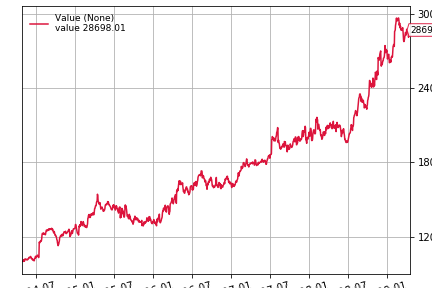

[[<Figure size 432x288 with 1 Axes>]]

In [254]:
cerebro.plot()

In [255]:
results[0].analyzers.sharperatio.get_analysis()

OrderedDict([('sharperatio', 1.7507335211261146)])

In [256]:
results[0].analyzers.returns.get_analysis()

OrderedDict([('rtot', 1.0542427486260026),
             ('ravg', 0.0008386974929403362),
             ('rnorm', 0.23534683439711296),
             ('rnorm100', 23.534683439711294)])

In [215]:
results[0].analyzers.drawdown.get_analysis()

AutoOrderedDict([('len', 26),
                 ('drawdown', 2.6648193379437655),
                 ('moneydown', 461.70249999999214),
                 ('max',
                  AutoOrderedDict([('len', 332),
                                   ('drawdown', 16.240635941175956),
                                   ('moneydown', 2309.059999999994)]))])

In [168]:
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS